#Credit Score Classification

##Business Understanding

###Permasalahan Bisnis

Walaupun perusahaan telah menyediakan berbagai solusi keuangan berbasis teknologi, terdapat beberapa tahapan yang masih dilakukan secara manual, salah satu tahapan tersebut ialah pemeriksaan risiko kredit ketika individu dan pelaku usaha mengajukan pinjaman. Oleh karena itu, Finance Merdeka berupaya untuk mengoptimalkan tahapan tersebut.

Selama bertahun-tahun, perusahaan telah mengumpulkan data terkait keuangan bank dan mengumpulkan banyak informasi terkait kredit dari nasabahnya. Manajemen ingin membangun sistem cerdas untuk mengoptimalkan proses pemeriksaan risiko kredit.

###Cakupan Proyek

Mengembangkan sebuah sistem prediksi berbasis machine learning dengan berbagai pendekatan atau algoritma machine learning untuk mendapatkan yang performa yang terbaik.

**Menyiapkan data dan library yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
!kaggle datasets download -d parisrohan/credit-score-classification
!mkdir -p /project/data
!unzip credit-score-classification.zip -d /project/data

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 95% 9.00M/9.51M [00:01<00:00, 10.7MB/s]
100% 9.51M/9.51M [00:01<00:00, 6.54MB/s]
Archive:  credit-score-classification.zip
  inflating: /project/data/test.csv  
  inflating: /project/data/train.csv  


##Data Understanding

###Dataset info

- **ID**: Unique identifier for each entry in the dataset.
- **Customer_ID**: Identifier for each customer.
- **Month**: Month of data collection.
- **Name**: Name of the customer.
- **Age**: Age of the customer.
- **SSN**: Social Security Number of the customer.
- **Occupation**: Occupation of the customer.
- **Annual_Income**: Annual income of the customer.
- **Monthly_Inhand_Salary**: Monthly salary after deductions.
- **Num_Bank_Accounts**: Number of bank accounts the customer has.
- **Num_Credit_Card**: Number of credit cards the customer has.
- **Interest_Rate**: Interest rate applied on loans.
- **Num_of_Loan**: Number of loans the customer has.
- **Type_of_Loan**: Type of loan taken by the customer.
- **Delay_from_due_date**: Number of days delayed from due date for payments.
- **Num_of_Delayed_Payment**: Number of delayed payments made by the customer.
- **Changed_Credit_Limit**: Indicates if the credit limit has been changed.
- **Num_Credit_Inquiries**: Number of credit inquiries made by the customer.
- **Credit_Mix**: Mix of different types of credit accounts held by the customer.
- **Outstanding_Debt**: Amount of outstanding debt.
- **Credit_Utilization_Ratio**: Ratio of credit used to credit available.
- **Credit_History_Age**: Age of credit history.
- **Payment_of_Min_Amount**: Indicates if minimum payment amount is met.
- **Total_EMI_per_month**: Total Equated Monthly Installment (EMI) paid by the customer.
- **Amount_invested_monthly**: Amount invested monthly by the customer.
- **Payment_Behaviour**: Payment behavior of the customer.
- **Monthly_Balance**: Monthly balance in the account.
- **Credit_Score**: Target variable - credit score of the customer.

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/project/data/train.csv')
df

<ipython-input-3-006b04875d32>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/project/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


###Data Cleansing

Jika sekilas kita lihat terdapat beberapa masalah dalam dataset, ini tentunya perlu kita periksa secara lebih mendalam. Pertama, kita cek terlebih dahulu jumlah missing value yang terdapat dalam dataset.

In [4]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Terdapat missing value pada beberapa kolom. Sebelum membersihkannya, kita cek terlebih dahulu tipe data dari setiap datanya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Terdapat beberapa feature yang memiliki tipe data yang tidak sesuai dengan nama kolom/deskripsinya, kemungkinan terdapat beberapa feature yang memiliki nilai yang salah/invalid value.

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x25fb6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0x942c,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,20867.67,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


Sesuai dugaan kita, terdapat beberapa nilai yang tidak sesuai seperti ```"_10000__", "__-333333333333333333333333333__"```, dll. Nilai ini perlu kita bersihkan untuk mengubah tipe data dari feature tersebut.

In [7]:
def cleaning_invalid_value(col):
    if isinstance(col, str) and "__" in col:
        return np.NaN
    elif isinstance(col, str) and "_" in col:
        return np.NaN
    else:
        return col

new_df = df.copy()
invalid_numerical_columns = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in invalid_numerical_columns:
    new_df[col] = new_df[col].apply(cleaning_invalid_value)
    new_df[col] = new_df[col].astype('float')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

Nah, setelah simbol “_” atau “__” yang terdapat pada setiap nilai dibersihkan, bisa kita lihat sebagian besar feature telah memiliki tipe data yang sesuai, namun feature Credit_History_Age yang berisi umur riwayat kredit setiap nasabah, berupa format teks (15 Years and 11 Months) sehingga tidak dapat dilakukan operasi perhitungan dan digunakan untuk melatih model, untuk itu perlu kita ubah formatnya menjadi jumlah bulan (191).

In [8]:
def change_format(col):
    try:
        year, month = 0, 0
        if re.search('year', col, re.IGNORECASE):
            year = int(re.findall('\d+', col)[0])
        if re.search('month', col, re.IGNORECASE):
            month = int(re.findall('\d+', col)[1])
        return year*12+month
    except:
        return np.NaN

new_df['Credit_History_Age'] = new_df['Credit_History_Age'].apply(change_format)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

Seperti yang kita tahu bahwa feature Annual_Income dan Monthly_Inhand_Salary merepresentasikan hal yang sama yaitu pendapatan yang diperoleh setiap nasabah. Oleh karena itu, akan kita hapus salah satunya dan beberapa feature yang tidak diperlukan dalam analisis kali ini.

In [9]:
new_df.drop(["ID", "Name", "SSN", "Annual_Income"], axis=1, inplace=True)

##Pembersihan Data Numerical

In [10]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

new_df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,95061.0,110.934505,689.407864,-500.000000,24.000000,33.000000,42.000000,8698.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Num_of_Loan,95215.0,2.780339,62.500940,-100.000000,1.000000,3.000000,5.000000,1496.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,90254.0,31.033051,226.955758,-3.000000,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,97909.0,10.389025,6.789496,-6.490000,5.320000,9.400000,14.870000,36.970000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000


Terlihat beberapa nilai yang tidak normal seperti usia -500 tahun, jumlah akun bank sebanyak 1798, dll. Nilai tersebut perlu divalidasi terlebih dahulu.

In [11]:
def check_invalid_values(df, invalid_value, column):
    df = df.copy()
    customer_id = df[(df[column] == invalid_value)].groupby(by="Customer_ID", as_index=False)["Num_Bank_Accounts"].mean()
    print(df[df.Customer_ID.isin(customer_id.Customer_ID)])

check_invalid_values(new_df, -500, "Age")

      Customer_ID     Month    Age Occupation  Monthly_Inhand_Salary  \
0       CUS_0xd40   January   23.0  Scientist            1824.843333   
1       CUS_0xd40  February   23.0  Scientist                    NaN   
2       CUS_0xd40     March -500.0  Scientist                    NaN   
3       CUS_0xd40     April   23.0  Scientist                    NaN   
4       CUS_0xd40       May   23.0  Scientist            1824.843333   
...           ...       ...    ...        ...                    ...   
99963  CUS_0x372c     April -500.0     Lawyer                    NaN   
99964  CUS_0x372c       May   18.0     Lawyer            3468.315833   
99965  CUS_0x372c      June   19.0     Lawyer            3468.315833   
99966  CUS_0x372c      July   19.0     Lawyer            3468.315833   
99967  CUS_0x372c    August   19.0     Lawyer            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3      

Terlihat bahwa nilai-nilai tersebut adalah invalid value, oleh karena itu kita perlu menentukan batas maksimalnya untuk menghilangkan invalid value.

Pada proyek ini, kita memiliki data setiap nasabah selama bulan Januari sampai Agustus.
Untuk mendapatkan nilai batas maksimal yang sesuai (bukan invalid value), kita akan mengelompokkan nilai setiap feature dari bulan Januari hingga Agustus berdasarkan Customer ID lalu kita ambil nilai modusnya per Customer ID, sehingga kita bisa mendapatkan nilai yang sesuai dan terhindar dari nilai invalid value. Kemudian kita ambil nilai maksimal dari semua nilai modusnya untuk menentukan batas maksimal.

In [12]:
new_df[new_df['Num_Bank_Accounts'].notna()].groupby('Customer_ID')['Num_Bank_Accounts'].apply(list)

Customer_ID
CUS_0x1000    [6, 6, 6, 6, 6, 6, 6, 6]
CUS_0x1009    [6, 6, 6, 6, 6, 6, 6, 6]
CUS_0x100b    [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x1011    [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1013    [3, 3, 3, 3, 3, 3, 3, 3]
                        ...           
CUS_0xff3     [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0xff4     [8, 8, 8, 8, 8, 8, 8, 8]
CUS_0xff6     [5, 5, 5, 5, 5, 5, 5, 5]
CUS_0xffc     [6, 6, 6, 6, 6, 6, 6, 6]
CUS_0xffd     [8, 8, 8, 8, 8, 8, 8, 8]
Name: Num_Bank_Accounts, Length: 12500, dtype: object

In [13]:
def get_group_min_max(df, groupby, column):
  cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
  maxi = cur.apply(lambda x: stats.mode(x)).max()
  return maxi[0]

for i in numerical_columns:
  print(i, get_group_min_max(new_df, 'Customer_ID', i))

Age 56.0
Monthly_Inhand_Salary 15204.633333333331
Num_Bank_Accounts 10
Num_Credit_Card 11
Interest_Rate 34
Num_of_Loan 9.0
Delay_from_due_date 62
Num_of_Delayed_Payment 28.0
Changed_Credit_Limit 29.98
Num_Credit_Inquiries 17.0
Outstanding_Debt 4998.07
Credit_Utilization_Ratio 38.112156538421054
Total_EMI_per_month 1779.1032538262775
Amount_invested_monthly 510.7262372637133
Monthly_Balance 1183.9306960885192
Credit_History_Age 397.0


Setelah mendapatkan batas maksimal dari setiap feature, dengan mempertimbangkan nilai yang tidak normal bisa kita simpulkan
bahwa:
- Pada kolom Age, semua nilai yang lebih kecil dari 0 atau lebih besar dari 56 merupakan invalid value.
- Pada kolom Num_Bank_Accounts, semua nilai yang lebih kecil dari 0 atau lebih besar dari 10 merupakan invalid value.
- Pada kolom Num_Credit_Card, semua nilai yang lebih kecil dari 0 atau lebih besar dari 11 merupakan invalid value.
- Pada kolom Interest_Rate, semua nilai yang lebih besar dari 34 merupakan invalid value.
- Pada kolom Num_of_Loan, semua nilai yang lebih kecil dari 0 atau lebih besar dari 9 merupakan invalid value.
- Pada kolom Delay_from_due_date, semua nilai yang lebih kecil dari 0 merupakan invalid value.
- Pada kolom Num_of_Delayed_Payment, semua nilai yang lebih kecil dari 0 atau lebih besar dari 28 merupakan invalid value.
- Pada kolom Changed_Credit_Limit, semua nilai yang lebih kecil dari 0 merupakan invalid value.
- Pada kolom Num_Credit_Inquiries, semua nilai yang lebih besar dari 17 merupakan invalid value.
- Pada kolom Total_EMI_per_month, semua nilai yang lebih besar dari 1780 merupakan invalid value.

Untuk itu kita perlu sesuaikan nilainya untuk membersihkan invalid value.

In [14]:
new_df["Age"] = new_df.Age.apply(lambda x: np.NaN if x<0 or x>56 else x)
new_df["Num_Bank_Accounts"] = new_df.Num_Bank_Accounts.apply(lambda x: np.NaN if x<0 or x>10 else x)
new_df["Num_Credit_Card"] = new_df.Num_Credit_Card.apply(lambda x: np.NaN if x<0 or x>11 else x)
new_df["Interest_Rate"] = new_df.Interest_Rate.apply(lambda x: np.NaN if x>34 else x)
new_df["Num_of_Loan"] = new_df.Num_of_Loan.apply(lambda x: np.NaN if x<0 or x>9 else x)
new_df["Delay_from_due_date"] = new_df.Delay_from_due_date.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_of_Delayed_Payment"] = new_df.Num_of_Delayed_Payment.apply(lambda x: np.NaN if x<0 or x>28 else x)
new_df["Changed_Credit_Limit"] = new_df.Changed_Credit_Limit.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_Credit_Inquiries"] = new_df.Num_Credit_Inquiries.apply(lambda x: np.NaN if x>17 else x)
new_df["Total_EMI_per_month"] = new_df.Total_EMI_per_month.apply(lambda x: np.NaN if x>1780 else x)

new_df[numerical_columns].describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,92365.0,33.314145,10.770143,14.000000,24.000000,33.000000,42.000000,56.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,98655.0,5.368466,2.592011,0.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,97729.0,5.533322,2.067703,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,97966.0,14.531603,8.739748,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,90892.0,3.534172,2.447488,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.081910,14.840204,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,88915.0,13.424529,6.207212,0.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,97909.0,10.427352,6.720510,0.000000,5.320000,9.400000,14.870000,36.970000
Num_Credit_Inquiries,96385.0,5.781117,3.860712,0.000000,3.000000,5.000000,8.000000,17.000000


Sekarang kita coba cek missing value yang terdapat dalam feature numerik.

In [15]:
new_df[numerical_columns].isnull().sum()

Age                          7635
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1345
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  9108
Delay_from_due_date             0
Num_of_Delayed_Payment      11085
Changed_Credit_Limit         2091
Num_Credit_Inquiries         3615
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Total_EMI_per_month          3121
Amount_invested_monthly      8784
Monthly_Balance              1209
Credit_History_Age           9030
dtype: int64

Untuk mengganti missing value yang terdapat dalam dataset, kita akan mengisinya dengan nilai median setiap feature dari data bulan Januari sampai Agustus yang dikelompokkan berdasarkan Customer_ID (sama seperti teknik yang digunakan untuk menentukan batas maksimal). Namun untuk feature Monthly_Balance dan Credit_History_Age kita akan terapkan teknik yang berbeda.

In [16]:
def fill_numerical_missing_value(column, how, df):
    df = df.copy()

    missing_customer_id = df[df[column].isna()].Customer_ID
    medians = df[df.Customer_ID.isin(missing_customer_id)].groupby(by='Customer_ID', as_index=False).agg({
        column: how
    })

    for index, row in df[df[column].isna()].iterrows():
        df[column].iloc[index] = medians[medians.Customer_ID == str(row['Customer_ID'])][column]

    return df[column]

missing_numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly'
]

for col in missing_numerical_columns:
    new_df[col] = fill_numerical_missing_value(
        column=col,
        how="median",
        df=new_df
    )

Streaming output truncated to the last 5000 lines.
<ipython-input-16-51c150cb4537>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[index] = medians[medians.Customer_ID == str(row['Customer_ID'])][column]
<ipython-input-16-51c150cb4537>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[index] = medians[medians.Customer_ID == str(row['Customer_ID'])][column]
<ipython-input-16-51c150cb4537>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Untuk feature Monthly_Balance dan Credit_History_Age, kita akan gunakan nilai sebelumnya atau sesudahnya untuk mengganti missing value.

In [17]:
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.ffill())
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.bfill())
new_df['Monthly_Balance'] = new_df['Monthly_Balance'].astype('float')

new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].astype('float')

In [18]:
new_df[numerical_columns].isnull().sum()

Age                         0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_History_Age          0
dtype: int64

In [19]:
new_df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.765040,14.000000,24.000000,33.000000,42.000000,56.000000
Monthly_Inhand_Salary,100000.0,4198.490149,3187.491752,303.645417,1626.761667,3095.978333,5961.637500,15204.633333
Num_Bank_Accounts,100000.0,5.368750,2.593095,0.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.533680,2.067126,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.081910,14.840204,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.332490,6.265679,0.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.426638,6.715825,0.000000,5.340000,9.400000,14.850000,36.970000
Num_Credit_Inquiries,100000.0,5.779590,3.861453,0.000000,3.000000,5.000000,8.000000,17.000000


## Pembersihan Data Categorical

In [20]:
categorical_columns = [
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt 

Jika melihat hasil tersebut secara mendetail, terdapat invalid value pada feature Occupation dengan nilai “_______” dan pada feature Payment_Behaviour dengan nilai “!@9#%8”. Selain itu, pada feature Type_of_Loan terdapat data yang memiliki lebih dari satu kategori contohnya, seperti “Not Specified, Mortgage Loan, Auto Loan, and Payday Loan“.

Kita ganti nilai “_______” dalam feature Occupation menjadi missing value, Kemudian invalid value pada feature Credit_Mix dan Payment_Behaviour diubah menjadi nilai “Unknown”. Selain itu, pada feature Type_of_Loan, kita hanya akan mengambil kategori pertama untuk data yang memiliki lebih dari satu kategori.

In [21]:
new_df['Occupation'] = new_df['Occupation'].apply(lambda x: np.NaN if x == "_______" else x)
new_df['Credit_Mix'] = new_df['Credit_Mix'].str.replace('_','Unknown')
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].str.replace('!@9#%8','Unknown')

new_df['Type_of_Loan'] = new_df[new_df.Type_of_Loan.notnull()]['Type_of_Loan'].apply(lambda x: str(x).split(',')[0])

In [22]:
for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64
Payment_of_M

Sekarang kita coba lihat jumlah missing value yang terdapat dalam feature kategorikal tersebut.

In [23]:
new_df[categorical_columns].isnull().sum()

Month                        0
Occupation                7062
Type_of_Loan             11408
Credit_Mix                   0
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score                 0
dtype: int64

Untuk membersihkan missing value dari kolom feature Occupation, kita akan menggunakan nilai sebelumnya atau sesudahnya. Missing value pada feature Type_of_Loan akan diubah menjadi “Not Specified”.

In [24]:
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.ffill())
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.bfill())

new_df['Type_of_Loan'].fillna(value='Not Specified', inplace=True)

In [25]:
new_df[categorical_columns].isnull().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

##EDA

In [26]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,100000,12500,CUS_0x942c,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,33.31111,10.76504,14.0,24.0,33.0,42.0,56.0
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4198.490149,3187.491752,303.645417,1626.761667,3095.978333,5961.6375,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,5.36875,2.593095,0.0,3.0,5.0,7.0,10.0
Num_Credit_Card,100000.0,NaN,NaN,NaN,5.53368,2.067126,0.0,4.0,5.0,7.0,11.0
Interest_Rate,100000.0,NaN,NaN,NaN,14.53208,8.74133,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,100000.0,NaN,NaN,NaN,3.53288,2.446356,0.0,2.0,3.0,5.0,9.0
Type_of_Loan,100000,9,Not Specified,21256,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Categorical Data Distribution

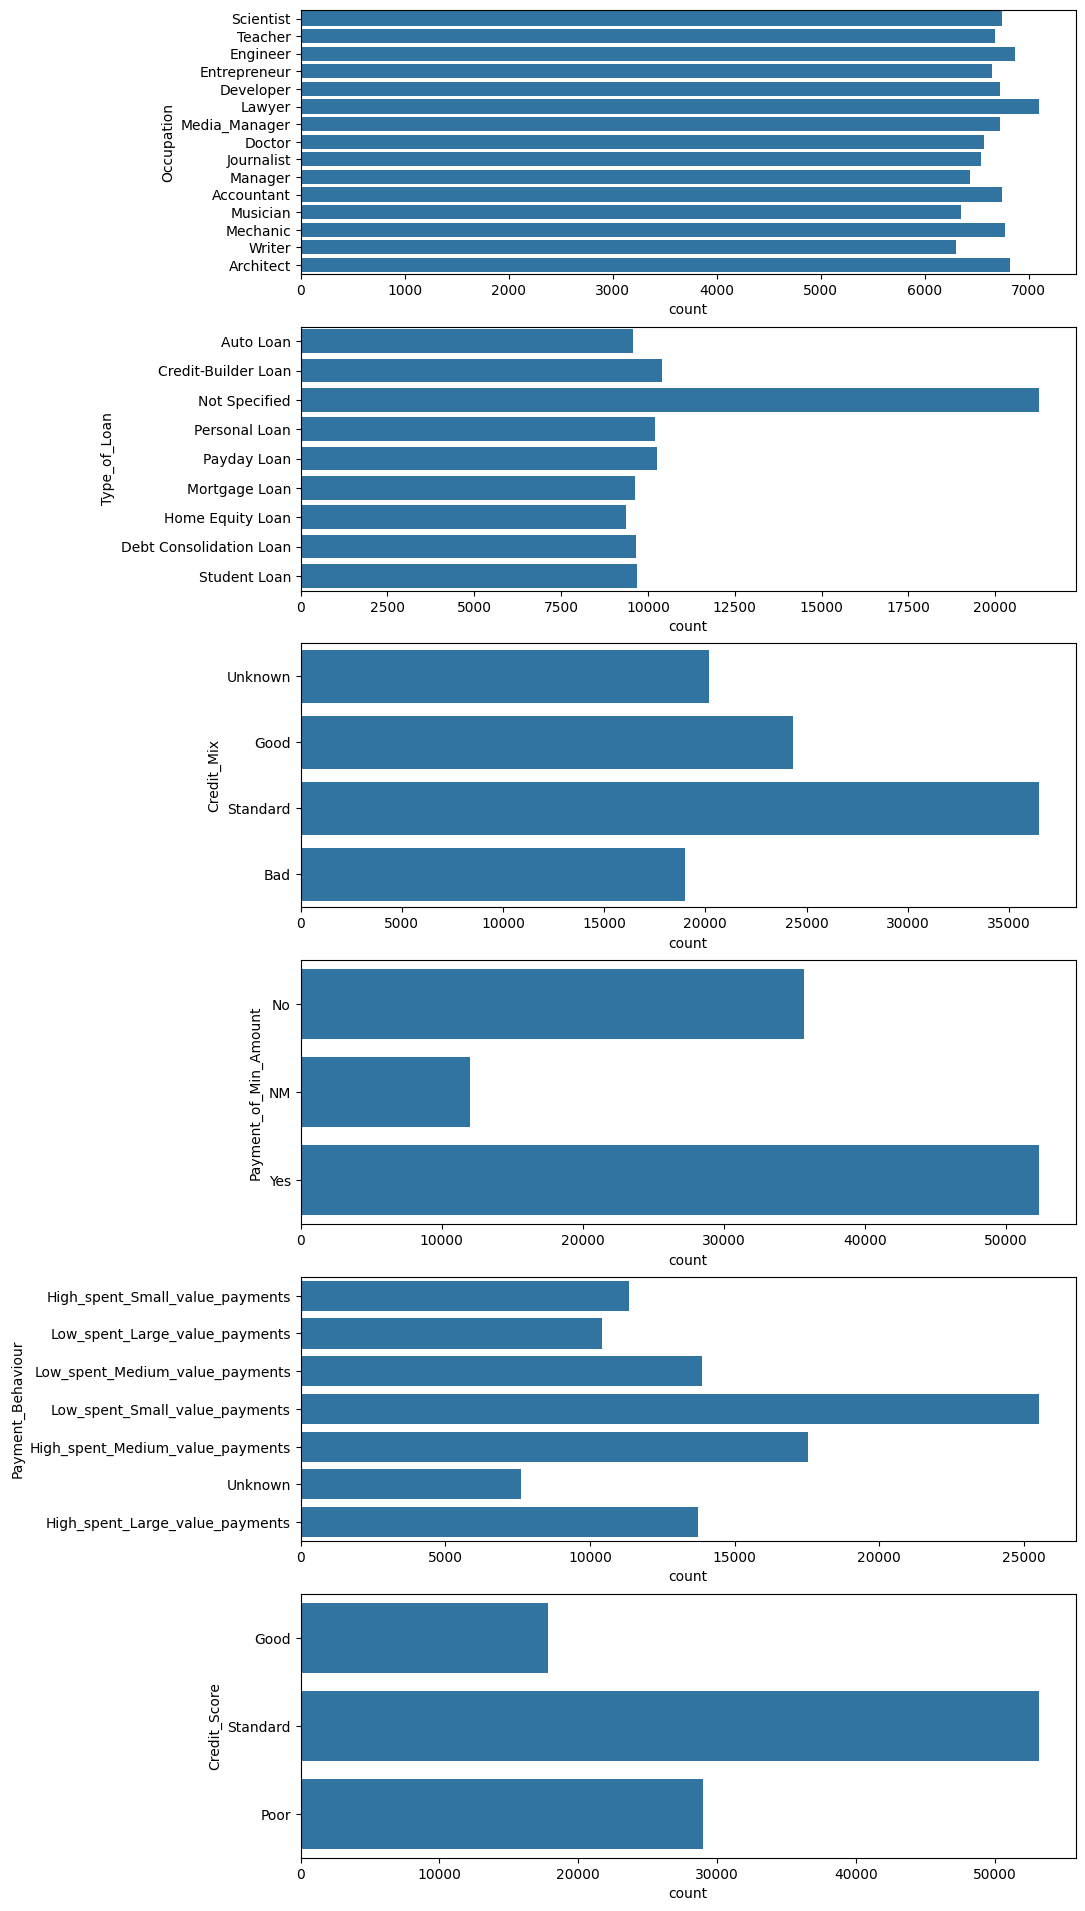

In [27]:
categorical_columns = [
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10,24))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i])
plt.show()

Berdasarkan visualisasi data di atas, feature Credit_Scoring didominasi oleh kategori “Standard” (imbalance data) yang berpotensi mengakibatkan terjadinya bias sehingga membuat model cenderung memprediksi kelas atau kategori yang dominan (mayoritas), oleh karena itu pada tahap preprocessing akan kita terapkan metode undersampling.

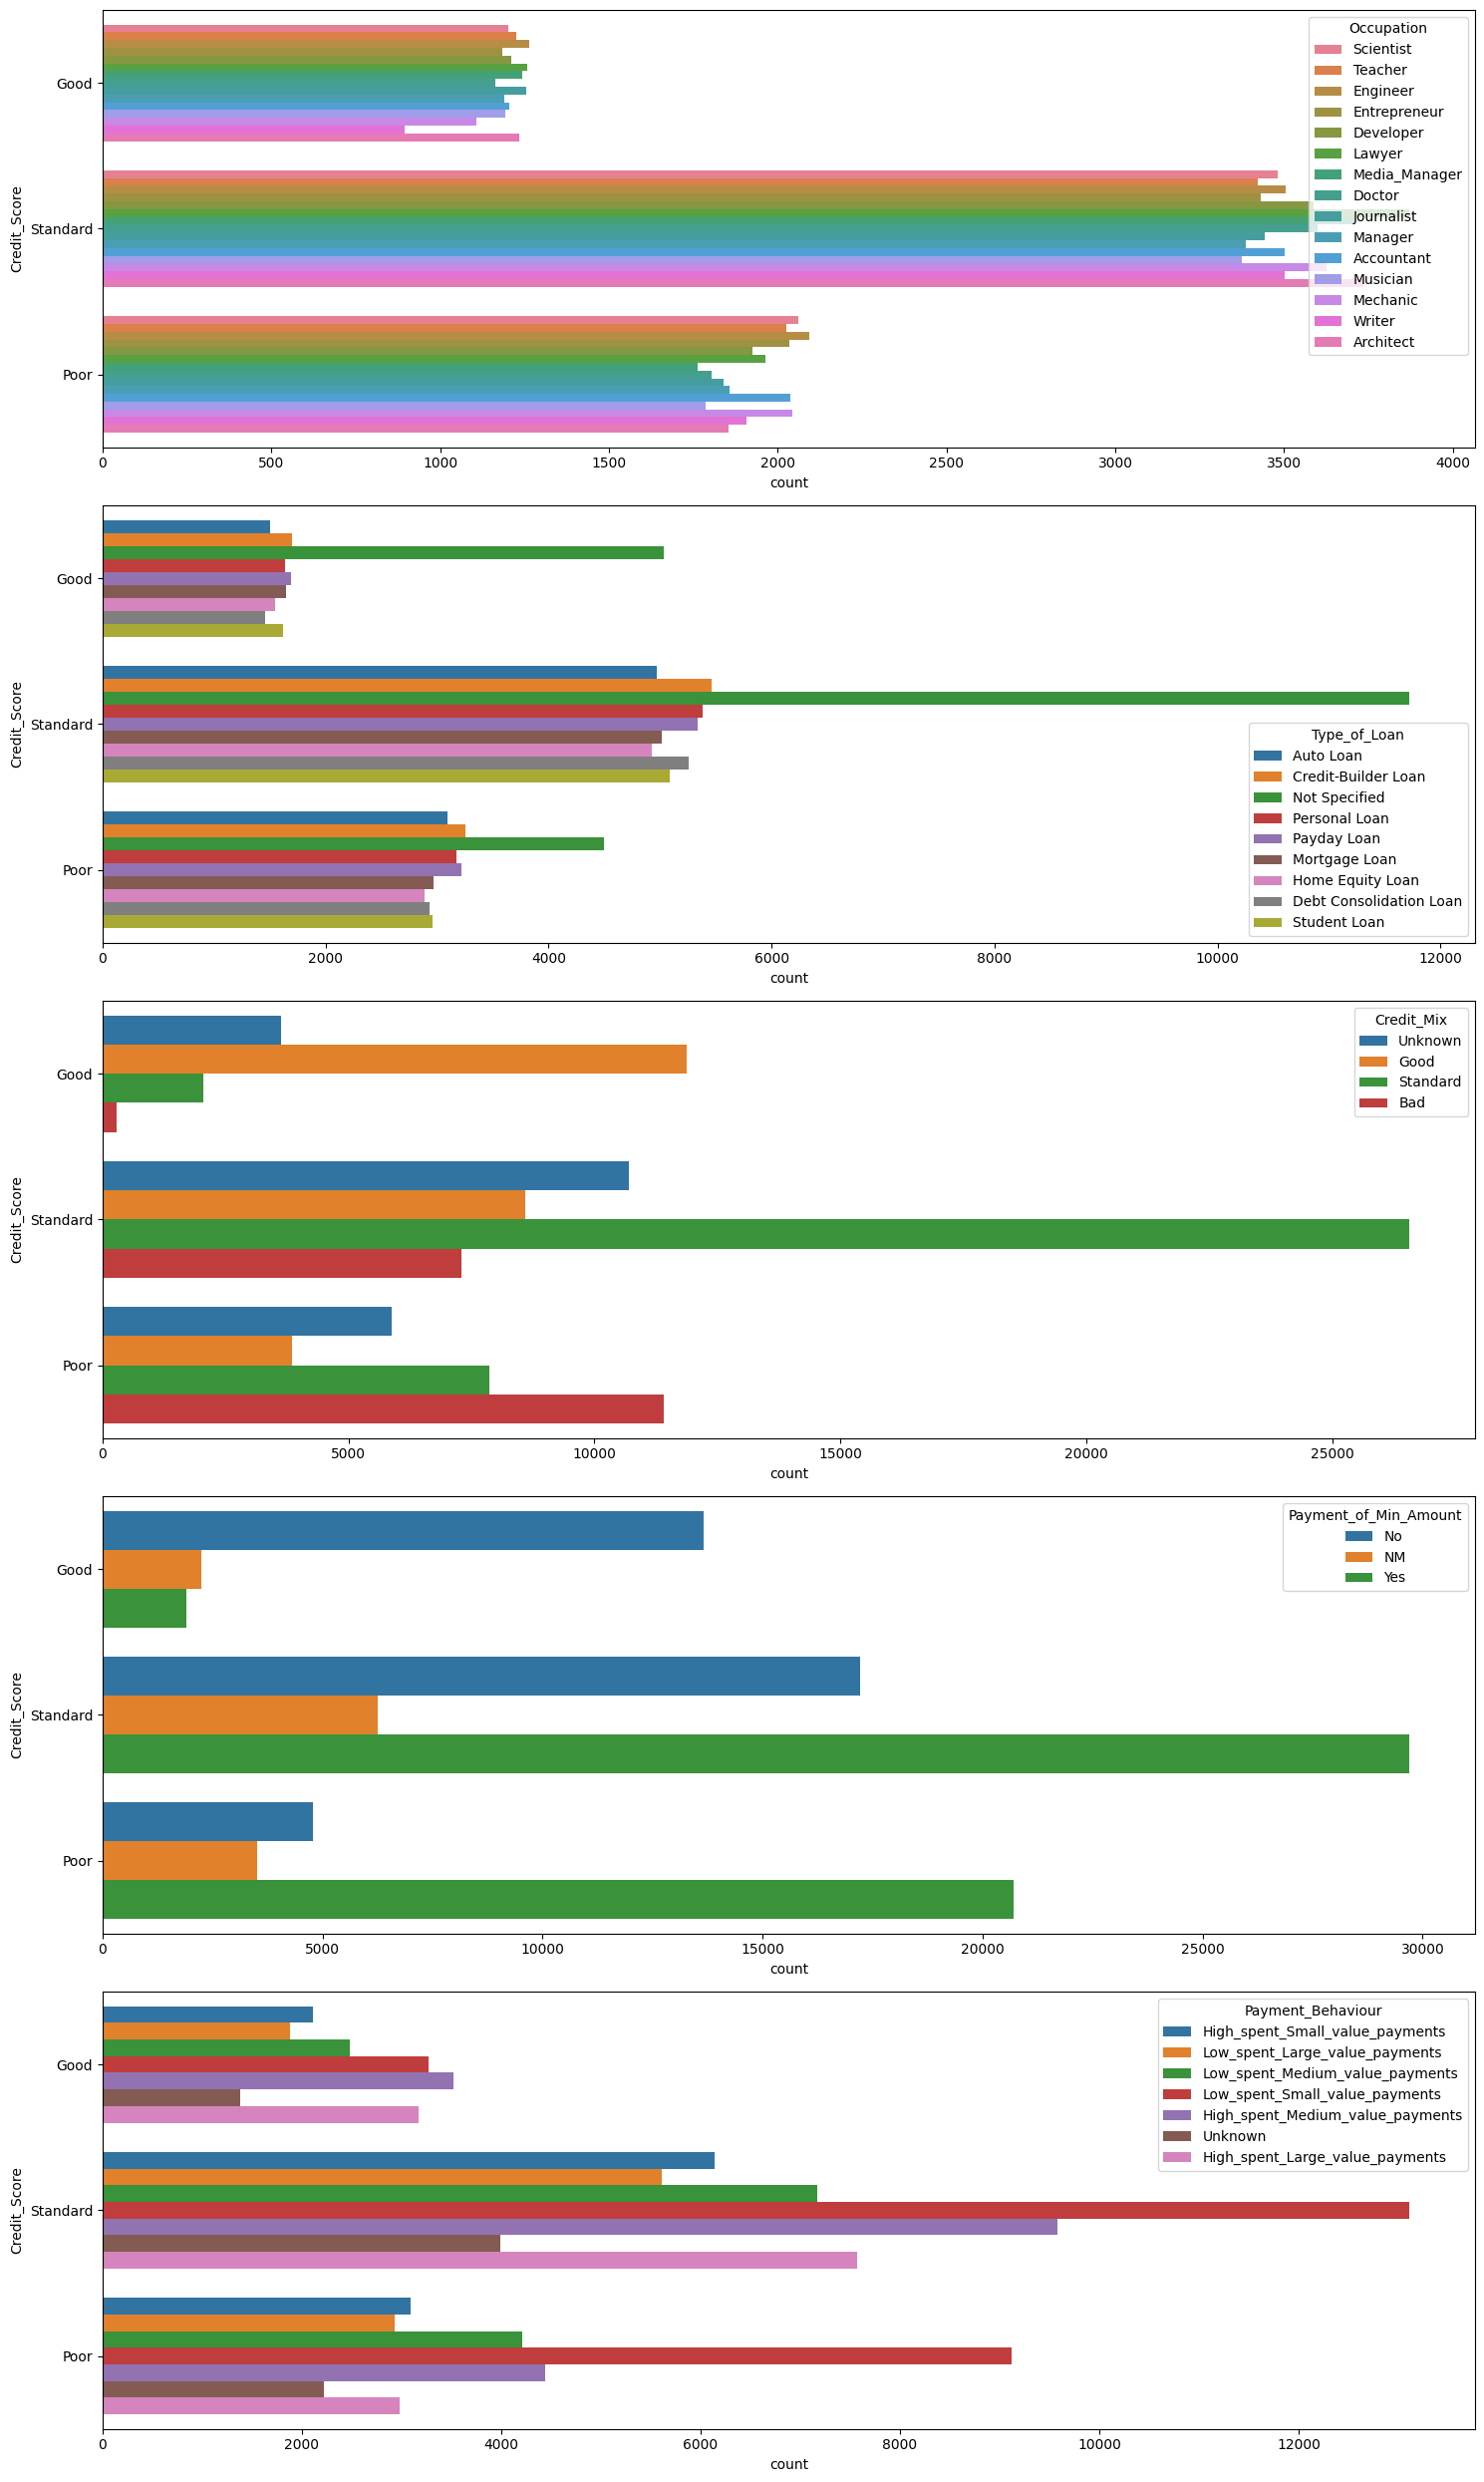

In [28]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,25))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[col for col in categorical_columns if col != 'Credit_Score'],
    df=cleaned_df,
    segment_feature="Credit_Score"
    )

Pada visualisasi data di atas, terdapat beberapa pola menarik antara lain seperti di bawah ini.

- Pelanggan dengan credit score baik (Good) memiliki kemampuan dalam mengelola kredit secara baik.
- Pelanggan dengan credit score yang buruk (Poor) dan Standard cenderung hanya melakukan pembayaran dengan jumlah minimum seperti yang terlihat pada kolom Payment_of_Min_Amount.
- Pelanggan dengan credit score yang buruk (Poor) dan Standard, biasanya memiliki profil “Low_spent_Small_value_payments” pada feature Payment_Behaviour.

Hasil visualisasi dari feature Occupation dan Type_of_Loan tidak terdapat pola yang menarik. Oleh karena itu, kita perlu mempertimbangkan penggunaan kedua feature tersebut untuk melatih model nantinya.

###Numerical Data Distribution

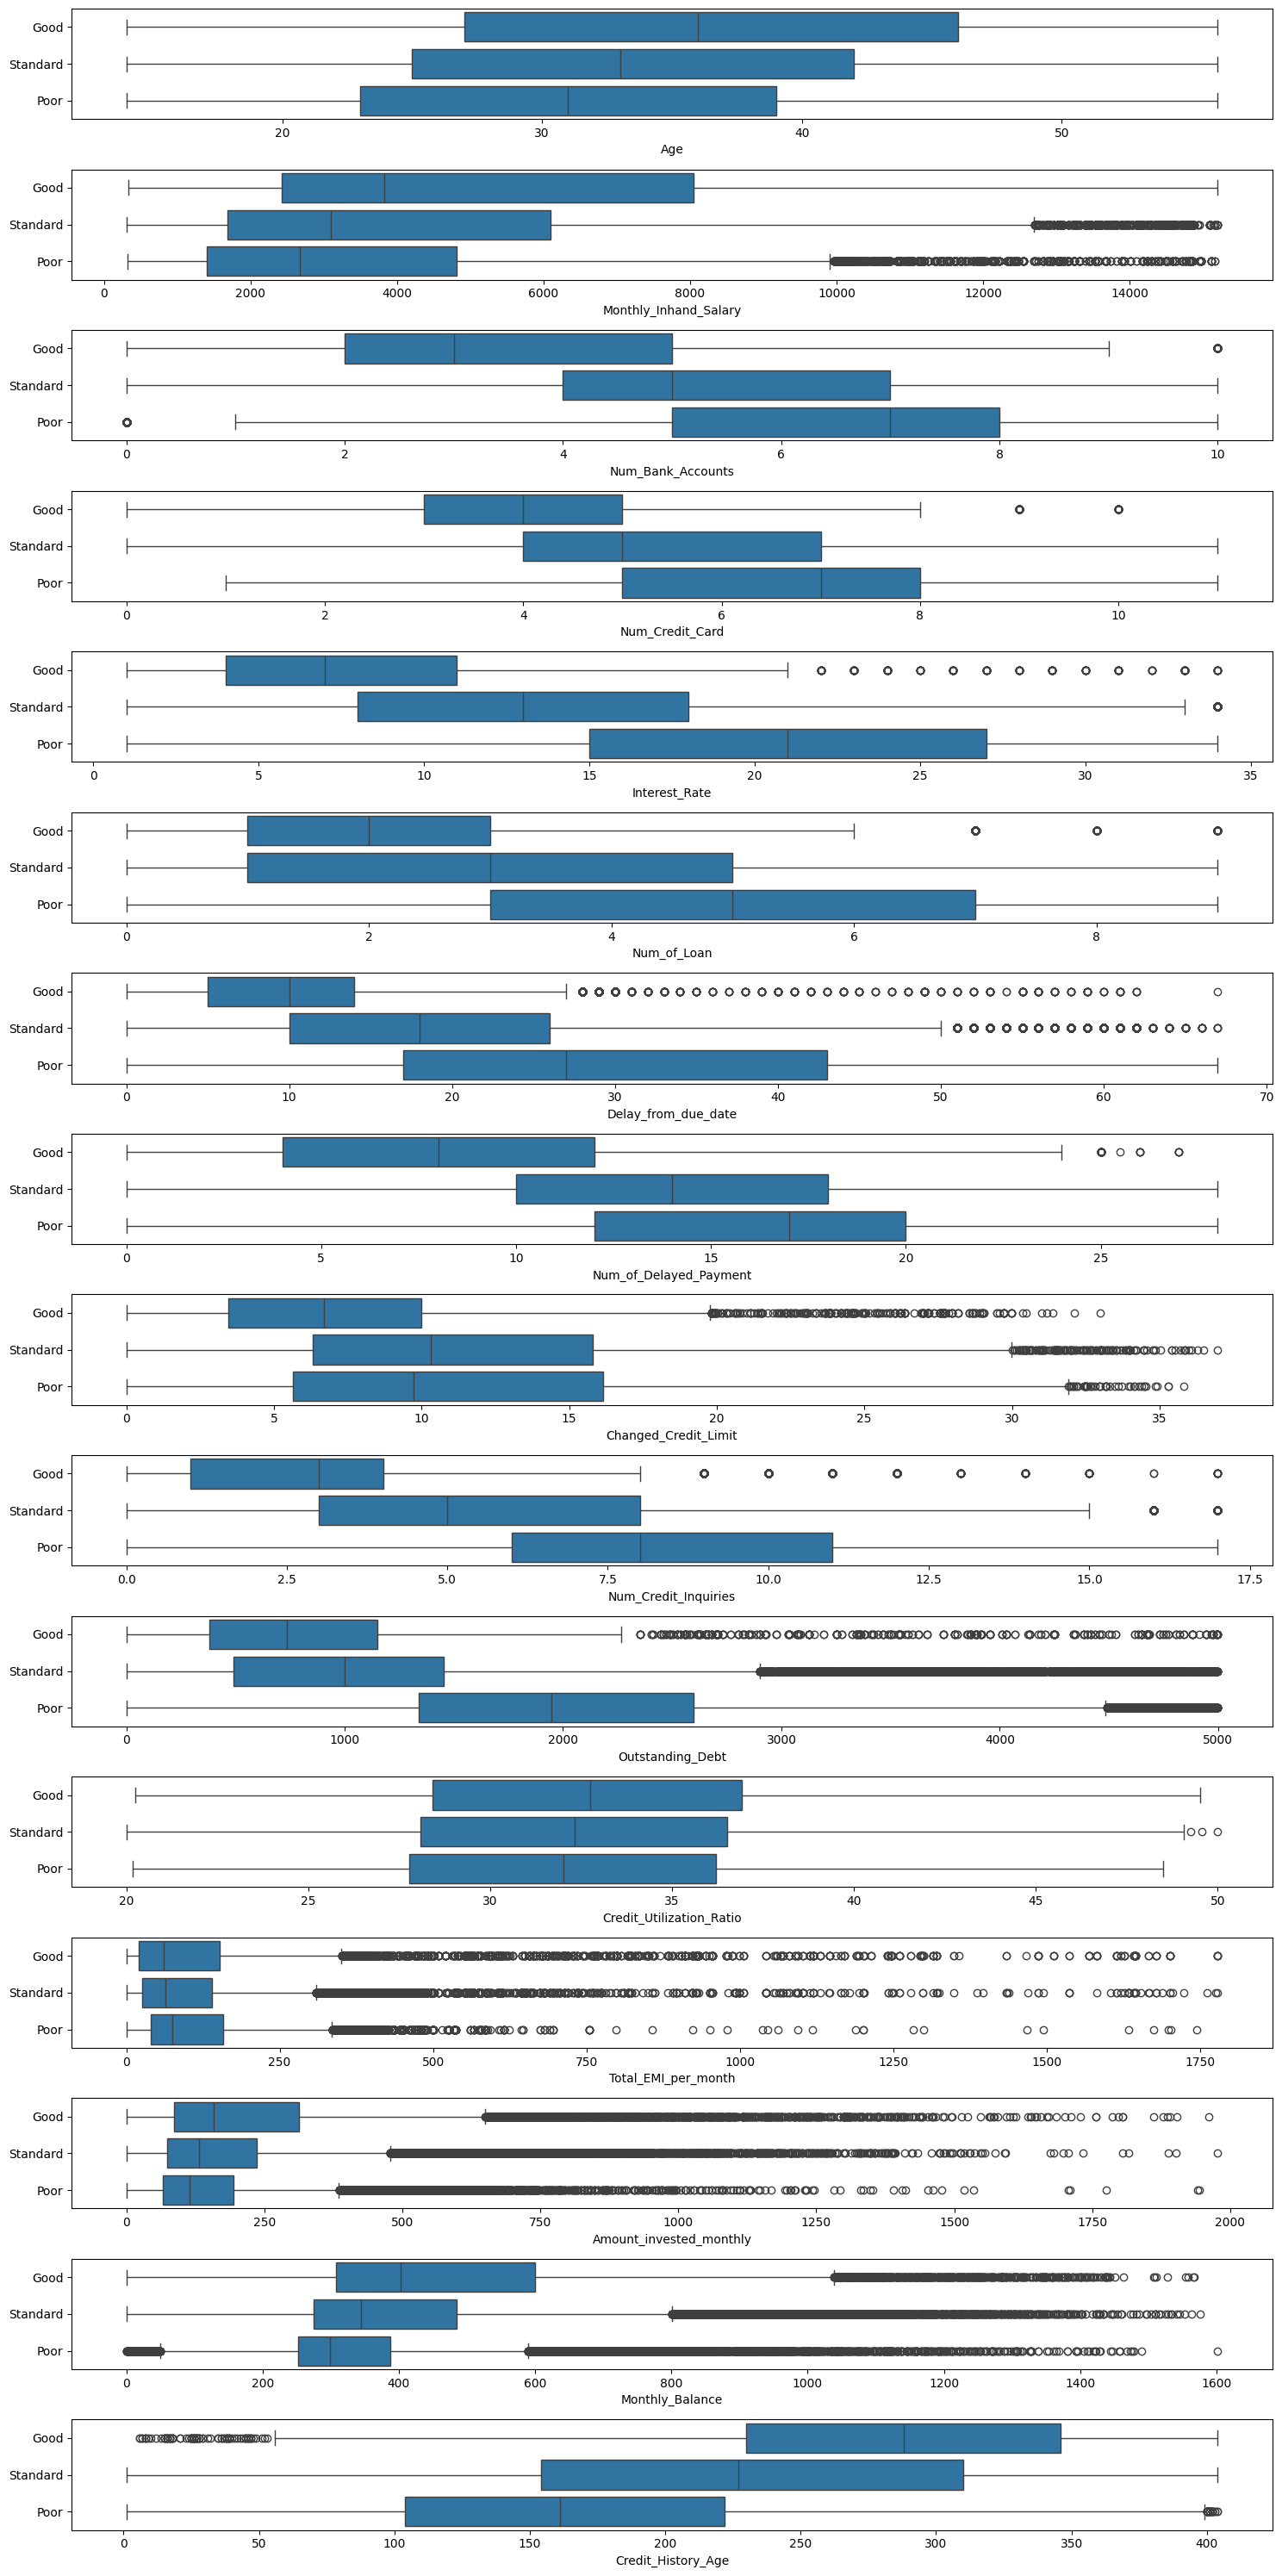

In [29]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Credit_Score"
    )

Pada visualisasi data di atas terlihat beberapa pola seperti berikut:

- Pelanggan yang memiliki credit score baik (Good) cenderung memiliki usia yang lebih tua.
- Semakin tinggi usia riwayat kredit seorang pelanggan, semakin baik pula credit score yang dimiliki oleh pelanggan tersebut.
- Pelanggan dengan credit score yang buruk (Poor) cenderung memiliki banyak akun bank, banyak kartu kredit, jumlah utang yang banyak, serta jumlah bunga kartu kredit yang tinggi. Selain itu, mereka juga cenderung untuk melakukan penunggakan pembayaran.

Tidak terdapat pola yang menarik pada feature Credit_Utilization_Ratio sehingga kita perlu mempertimbangkan penggunaan dari feature tersebut.

##Correlation Analysis

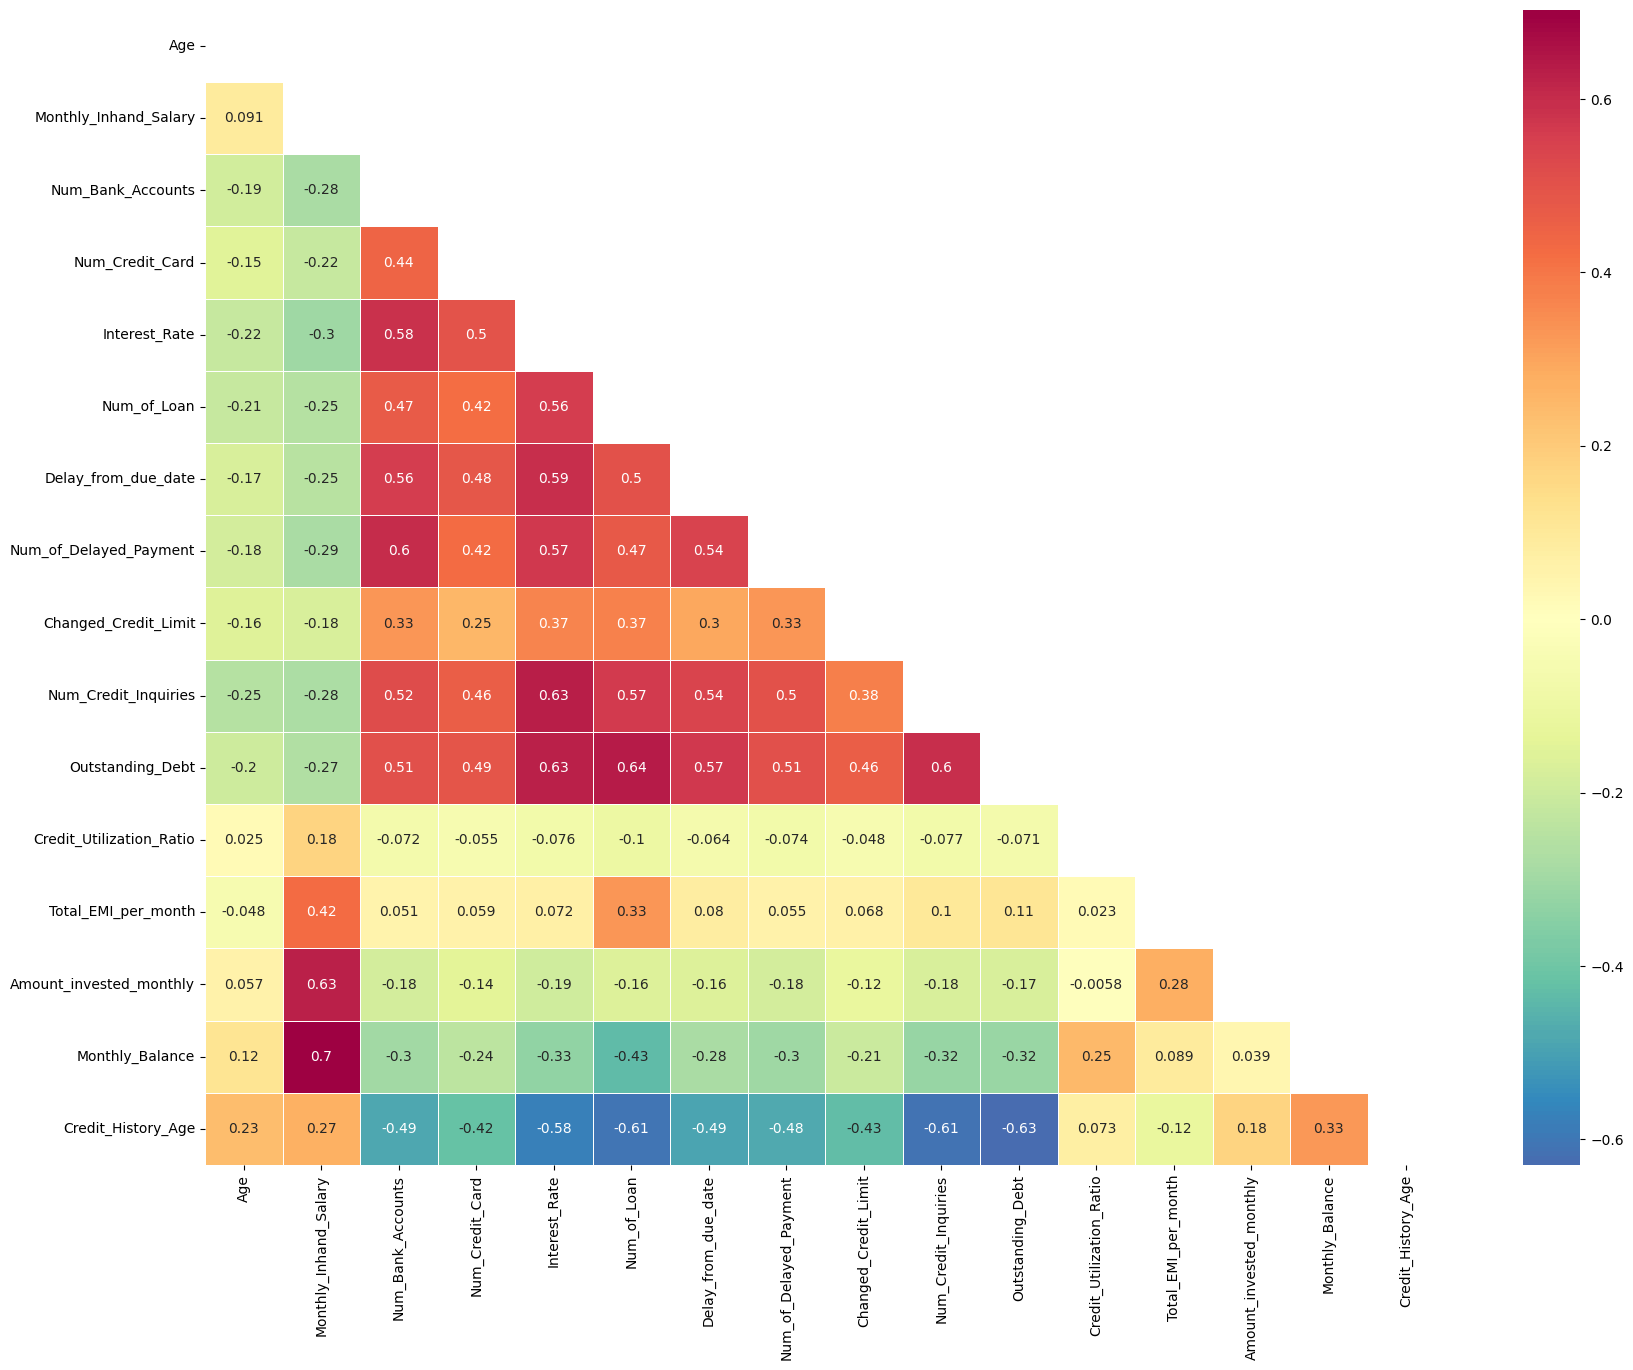

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(
    new_df[numerical_columns].corr(),
    mask= np.triu(new_df[numerical_columns].corr()),
    annot=True,
    cmap='Spectral_r',
    center=0,
    linecolor='white',
    linewidth=0.5
    )
plt.show()

Pada visualisasi data di atas, terlihat beberapa fitur yang saling berkorelasi secara positif maupun negatif. Hal ini menandakan adanya multikolinearitas pada dataset yang kita miliki. Masalah multikolinearitas ini akan kita selesaikan pada tahap data preprocessing. Namun, kita tidak bisa melakukan PCA pada seluruh feature tersebut dalam satu proses karena terdapat beberapa feature yang hanya berkorelasi pada feature tertentu. Oleh karena itu, kita perlu mengelompokkan feature yang saling berkorelasi tersebut dan membaginya menjadi dua bagian.

In [31]:
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]

pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month'
    ]

#Data Preprocessing

In [32]:
new_cleaned_df = cleaned_df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
new_cleaned_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Unknown,809.98,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


##Split Data

In [33]:
train_df, test_df = train_test_split(new_cleaned_df, test_size=0.1, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(90000, 19)
(10000, 19)


##Undersampling

Pada proses EDA sebelumnya, kita menemukan bahwa feature Credit_Score dalam dataset yang kita miliki didominasi oleh kategori “Standard”.

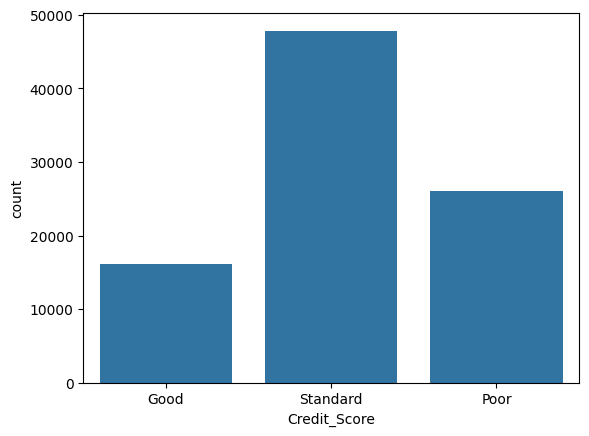

In [34]:
sns.countplot(data=train_df, x="Credit_Score")
plt.show()

Pada proyek ini, kita akan menerapkan teknik undersampling untuk menangani imbalanced data yang terdapat dalam data latih. Hal ini dilakukan karena kita memiliki jumlah data yang sangat banyak dan ingin menghindari duplikasi data.

In [35]:
train_df.Credit_Score.value_counts()

Credit_Score
Standard    47867
Poor        26053
Good        16080
Name: count, dtype: int64

In [36]:
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

In [37]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=16080, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16080, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16080, 19)
(16080, 19)


In [38]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
536,19.0,5849.733333,4.0,7.0,3.0,3.0,19.0,5.0,9.04,5.0,Good,847.35,352.0,No,171.806567,97.039826,High_spent_Medium_value_payments,566.126941,Poor
11625,22.0,5467.206667,10.0,6.0,25.0,7.0,43.0,24.0,14.28,12.0,Unknown,2313.63,184.0,Yes,310.140346,166.971937,High_spent_Medium_value_payments,372.059102,Standard
26004,29.0,3167.726667,2.0,4.0,7.0,0.0,1.0,5.0,0.60,4.0,Good,417.31,336.0,No,0.000000,96.251435,High_spent_Medium_value_payments,485.889622,Standard
18505,23.0,7846.892500,3.0,7.0,20.0,3.0,25.0,10.0,8.00,6.0,Standard,448.59,143.0,Yes,126.951702,536.587384,Low_spent_Large_value_payments,391.150164,Standard
19826,37.0,6626.053333,5.0,5.0,15.0,4.0,26.0,8.0,10.88,2.0,Standard,402.54,190.0,NM,167.486839,442.507162,Low_spent_Large_value_payments,322.611332,Standard


Kita lakukan resampling pada setiap data mayoritas, jumlah sampel yang diambil secara acak sebanyak 16.080 sesuai dengan jumlah sampel pada kelas minoritas.

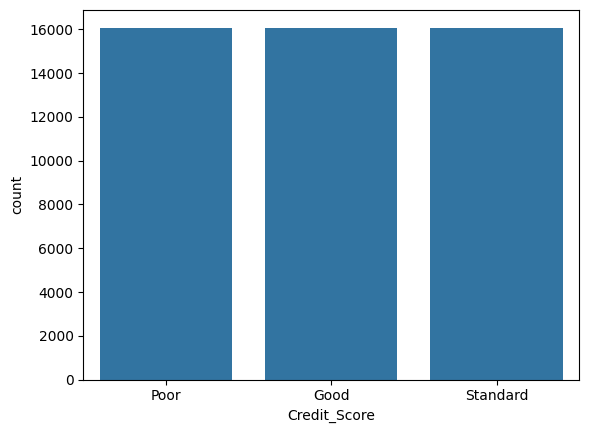

In [39]:
sns.countplot(data=undersampled_train_df, x="Credit_Score")
plt.show()

##Encoding and Scaling

Sebelum melakukan encoding dan scaling, kita perlu memisahkan antara feature training (X) dan target (Y).

In [40]:
X_train = undersampled_train_df.drop(columns='Credit_Score', axis=1)
y_train = undersampled_train_df['Credit_Score']

X_test = test_df.drop(columns='Credit_Score', axis=1)
y_test = test_df['Credit_Score']

Kita gunakan OneHotEncoder untuk metode encoder, dan MinMaxScaler untuk metode scalingnya. Pada OneHotEncoder kita gunakan parameter ```drop='first'``` untuk menghindari dummy variable trap dengan menghilangkan salah satu kategori(kategori pertama) pada setiap feature yang diencoding tanpa menghapus fungsi dari kategori yang dihilangkan.

In [41]:
!mkdir -p /project/model

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "/project/model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "/project/model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
            encoder.fit(df[[feature]])
            transformed_train = encoder.transform(df[[feature]])
            transformed_train_df = pd.DataFrame(transformed_train, columns=encoder.get_feature_names_out([feature]))
            df = pd.concat([df, transformed_train_df], axis=1).drop(columns=[feature])
            joblib.dump(encoder, "/project/model/encoder_{}.joblib".format(feature))

            transformed_test = encoder.transform(df_test[[feature]])
            transformed_test_df = pd.DataFrame(transformed_test, columns=encoder.get_feature_names_out([feature]))
            df_test = pd.concat([df_test, transformed_test_df], axis=1).drop(columns=[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
            encoder.fit(df[[feature]])
            transformed_train = encoder.transform(df[[feature]])
            transformed_train_df = pd.DataFrame(transformed_train, columns=encoder.get_feature_names_out([feature]))
            df = pd.concat([df, transformed_train_df], axis=1).drop(columns=[feature])
            joblib.dump(encoder, "/project/model/encoder_{}.joblib".format(feature))
        return df

In [42]:
numerical_columns = [col for col in numerical_columns if col != 'Credit_Utilization_Ratio']

categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

Sebelum masuk ke tahap berikutnya kita juga perlu melakukan encoding terhadap feature target pada data latih dan uji.

In [43]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, '/project/model/encoder_target.joblib')

new_y_test = encoder.transform(y_test)

##Principal Component Analysis (PCA)

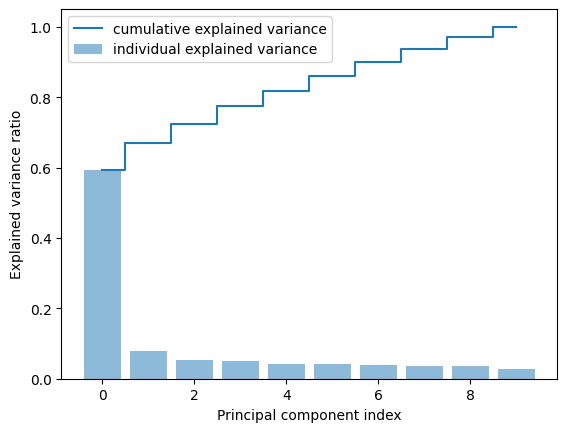

In [44]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=42)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Gambar di atas menunjukkan visualisasi jumlah varians untuk setiap jumlah komponen utama, yang bisa terjadi (sesuai dengan jumlah feature asli). Berdasarkan gambar tersebut terlihat bahwa, dengan hanya 5 komponen utama kita telah memperoleh lebih dari 80% varians. Ini berarti kita bisa mewakili seluruh kelompok feature tersebut (9 feature) hanya dengan 5 komponen utama. Kita akan mengganti kelompok feature asli dengan 5 komponen utama dari proses PCA.

In [45]:
pca_1 = PCA(n_components=5, random_state=42)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "/project/model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.500000,0.147796,0.143866,0.171182,0.059087,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.631993,-0.191223,0.309467,-0.071166,-0.051051
1,0.333333,0.391526,0.119292,0.033259,0.359736,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527332,-0.351437,-0.088578,-0.053515,-0.068709
2,0.690476,0.428754,0.216262,0.085402,0.235325,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.200895,-0.161095,0.292100,-0.228311,0.238909
3,0.119048,0.312166,0.074186,0.090408,0.272292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.038094,0.092272,-0.108024,0.055727,-0.129993
4,0.690476,0.018085,0.008564,0.018895,0.171664,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255938,0.049057,0.184879,-0.165969,-0.083744


Berikutnya kita akan melakukan proses yang sama untuk kelompok data berikutnya.

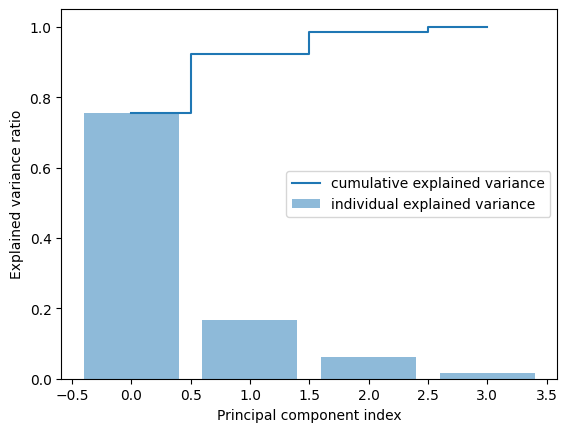

In [46]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Berdasarkan grafik tersebut terlihat bahwa hanya dengan menggunakan 2 komponen utama kita telah memperoleh 90% varians. Hal ini berarti kita bisa mewakili sebagian besar informasi dari seluruh feature pada kelompok ini (ada 4 feature) hanya menggunakan dua komponen utama.

Kemudian kita dapat melakukan proses PCA kembali dengan jumlah komponen utama sebanyak 2. Lalu, mengganti kelompok feature tersebut dengan 2 komponen utama dari proses PCA.

In [47]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "/project/model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.631993,-0.191223,0.309467,-0.071166,-0.051051,-0.161379,0.187894
1,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527332,-0.351437,-0.088578,-0.053515,-0.068709,0.137094,-0.091145
2,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.200895,-0.161095,0.292100,-0.228311,0.238909,0.142916,0.057955
3,0.119048,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.038094,0.092272,-0.108024,0.055727,-0.129993,0.040583,-0.011047
4,0.690476,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255938,0.049057,0.184879,-0.165969,-0.083744,-0.281933,-0.036925


Kode tersebut akan menghasilkan data latih seperti berikut serta menyimpan object PCA ini dalam berkas **pca_2.joblib**.

Sekarang kita hanya memiliki 11 feature (awalnya terdapat 19 feature) yang akan digunakan untuk melatih model machine learning. Kita lakukan hal yang sama untuk data uji.

In [48]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Age,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.380952,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.610798,-0.102473,0.260176,-0.050219,0.186688,-0.027267,-0.132111
1,0.095238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.769409,-0.266462,0.047076,0.292250,0.186756,-0.237128,0.017878
2,0.642857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.439717,-0.160076,0.061925,0.127795,-0.296594,0.625644,0.227209
3,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.358701,0.090072,0.403837,-0.162629,-0.226709,-0.193986,-0.054531
4,0.309524,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.528970,-0.475003,0.054057,-0.025789,-0.193363,0.251384,-0.120641


#Modeling

Kita akan membandingkan tiga model dengan algoritma berbeda kemudian kita gunakan yang memiliki performa terbaik, ketiga algoritma tersebut adalah Decision Tree Classifier, Random Forest Classifier, dan Extreme Gradient Boosting Classifier.

##Hyperparameter Tunning

###Decision Tree with Grid Search

In [49]:
tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [50]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}


In [51]:
tree_model = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=7,
    max_features='auto'
)

tree_model.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       random_state=42)

###Random Forest with Grid Search

In [52]:
rdf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 11],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 700]})

In [53]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 500}


In [54]:
rdf_model = RandomForestClassifier(
    random_state=42,
    criterion='gini',
    max_depth=11,
    max_features='auto',
    n_estimators=500,
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=11, max_features='auto', n_estimators=500,
                       n_jobs=-1, random_state=42)

###Extreme Gradient Boosting with Grid Search

In [55]:
xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [500, 700],
    'learning_rate': [0.01, 0.1],
    'max_depth': [9, 11, 15]
}

CV_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_xgb.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [9, 11, 15],
                         'n_estimators': [500, 700]})

In [56]:
print("best parameters: ", CV_xgb.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 700}


In [57]:
xgb_model = XGBClassifier(
    random_state=42,
    learning_rate=0.1,
    max_depth=15,
    n_estimators=700
)
xgb_model.fit(train_pca_df, new_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#Evaluation

Function yang kita gunakan untuk mengevaluasi model adalah confusion_matrix() dan classification_report().

In [58]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Good', 'Poor', 'Standard']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

###Decision Tree

              precision    recall  f1-score   support

        Good       0.45      0.84      0.59      1748
        Poor       0.61      0.72      0.66      2945
    Standard       0.83      0.51      0.63      5307

    accuracy                           0.63     10000
   macro avg       0.63      0.69      0.63     10000
weighted avg       0.70      0.63      0.63     10000



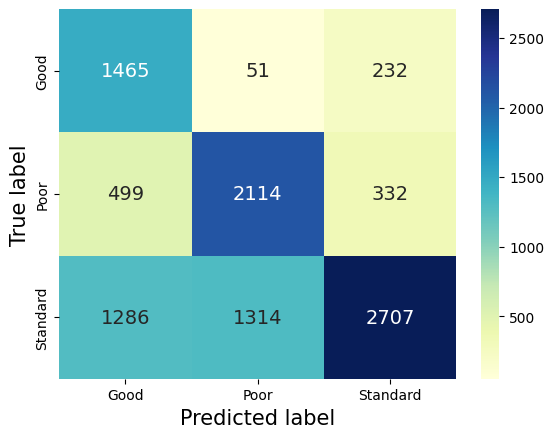

,Good,Poor,Standard
Good,1465,51,232
Poor,499,2114,332
Standard,1286,1314,2707


In [59]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

###Random Forest

              precision    recall  f1-score   support

        Good       0.48      0.83      0.61      1748
        Poor       0.63      0.74      0.68      2945
    Standard       0.84      0.56      0.67      5307

    accuracy                           0.66     10000
   macro avg       0.65      0.71      0.65     10000
weighted avg       0.71      0.66      0.66     10000



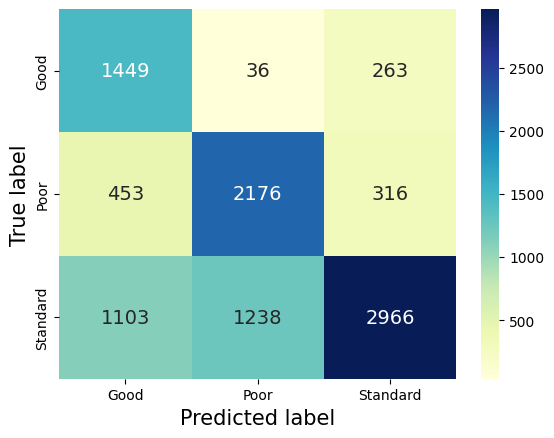

,Good,Poor,Standard
Good,1449,36,263
Poor,453,2176,316
Standard,1103,1238,2966


In [60]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

###Extreme Gradient Boosting

              precision    recall  f1-score   support

        Good       0.54      0.86      0.67      1748
        Poor       0.72      0.76      0.74      2945
    Standard       0.84      0.64      0.73      5307

    accuracy                           0.72     10000
   macro avg       0.70      0.76      0.71     10000
weighted avg       0.75      0.72      0.72     10000



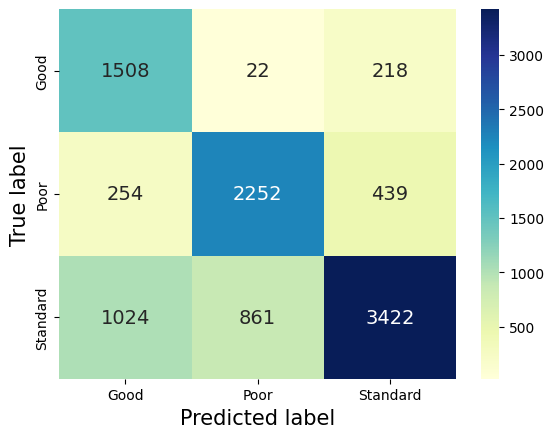

,Good,Poor,Standard
Good,1508,22,218
Poor,254,2252,439
Standard,1024,861,3422


In [61]:
y_pred_test = xgb_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

Kita perlu melihat performa model dalam mengidentifikasi pelanggan yang memiliki credit scoring yang buruk. Jika dilihat dari hasil evaluasi dari ketiga model di atas, terlihat bahwa model Extreme Gradient Boosting memiliki performa yang paling baik dalam mengidentifikasi pelanggan yang memiliki credit scoring yang buruk. Model inilah yang akan kita gunakan dalam membuat prototype sederhana untuk mengidentifikasi risiko kredit pelanggan.

### Save Model

In [62]:
joblib.dump(xgb_model, "/project/model/model.joblib")

['/project/model/model.joblib']